#### **Using nn.Sequential**

In [1]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

torch.set_printoptions(linewidth=150)    # 可以控制输出是否换行
torch.set_grad_enabled(True)

In [2]:
import time
from torch.utils.tensorboard import SummaryWriter
from collections import OrderedDict
from collections import namedtuple
from itertools import product
import pandas as pd
import json
from torch.utils.data import DataLoader
from IPython.display import clear_output
from IPython.display import display
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"    # 不加这句下面的跑不出来


In [3]:
import math
import matplotlib.pyplot as plt

In [4]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data/FashionMNIST',
    train=True,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

In [5]:
image, label = train_set[0]
image.shape

torch.Size([1, 28, 28])

In [6]:
image.squeeze()  # 默认压缩第一个维度，将三维表示转换为二位表示，方便画图

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510, 0.2863,
         0.0000, 0.0000, 0.0039, 0.0157, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000],
        [0.0000, 0.0000, 0.0

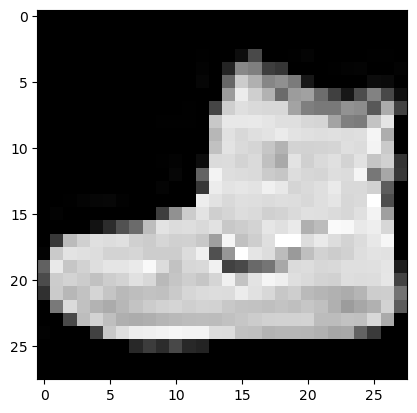

In [7]:
plt.imshow(image.squeeze(), cmap='gray')

In [8]:
train_set.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [9]:
in_features = image.numel()
in_features

784

In [10]:
out_features = math.floor(in_features / 2)
out_features

392

In [11]:
out_classes = len(train_set.classes)
out_classes

10

In [12]:
network1 = nn.Sequential(
    nn.Flatten(start_dim=1),
    nn.Linear(in_features, out_features),
    nn.Linear(out_features, out_classes)
)

network1

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=392, bias=True)
  (2): Linear(in_features=392, out_features=10, bias=True)
)

In [13]:
network1[1]

Linear(in_features=784, out_features=392, bias=True)

In [14]:
image = image.unsqueeze(0)
image.shape

torch.Size([1, 1, 28, 28])

In [15]:
network1(image)

tensor([[-0.0031, -0.1168,  0.0912,  0.0487, -0.2819, -0.0251, -0.1573,  0.2188,  0.2340,  0.0154]], grad_fn=<AddmmBackward0>)

In [17]:
layers = OrderedDict([
    ('flat', nn.Flatten(start_dim=1)),
    ('hidden', nn.Linear(in_features, out_features)),
    ('output', nn.Linear(out_features, out_classes))
])

network2 = nn.Sequential(layers)
network2

Sequential(
  (flat): Flatten(start_dim=1, end_dim=-1)
  (hidden): Linear(in_features=784, out_features=392, bias=True)
  (output): Linear(in_features=392, out_features=10, bias=True)
)

In [18]:
network2(image)

tensor([[-0.2577,  0.0535,  0.1154, -0.1503, -0.1865,  0.0440,  0.1405, -0.0357,  0.4967,  0.0501]], grad_fn=<AddmmBackward0>)

In [20]:
torch.manual_seed(50)     # 设置随机数种子，则两个网络初始化的权重数值相同
network1 = nn.Sequential(
    nn.Flatten(start_dim=1),
    nn.Linear(in_features, out_features),
    nn.Linear(out_features, out_classes)
)

torch.manual_seed(50)
layers = OrderedDict([
    ('flat', nn.Flatten(start_dim=1)),
    ('hidden', nn.Linear(in_features, out_features)),
    ('output', nn.Linear(out_features, out_classes))
])

network2 = nn.Sequential(layers)


In [21]:
network1(image), network2(image)

(tensor([[ 0.1681,  0.1028, -0.0790, -0.0659, -0.2436,  0.1328, -0.0864,  0.0016,  0.1819, -0.0168]], grad_fn=<AddmmBackward0>),
 tensor([[ 0.1681,  0.1028, -0.0790, -0.0659, -0.2436,  0.1328, -0.0864,  0.0016,  0.1819, -0.0168]], grad_fn=<AddmmBackward0>))

In [24]:
torch.manual_seed(50)
network3 = nn.Sequential()
network3.add_module('flat', nn.Flatten(start_dim=1))
network3.add_module('hidden', nn.Linear(in_features, out_features))
network3.add_module('output', nn.Linear(out_features, out_classes))

In [25]:
network1(image), network2(image), network3(image)

(tensor([[ 0.1681,  0.1028, -0.0790, -0.0659, -0.2436,  0.1328, -0.0864,  0.0016,  0.1819, -0.0168]], grad_fn=<AddmmBackward0>),
 tensor([[ 0.1681,  0.1028, -0.0790, -0.0659, -0.2436,  0.1328, -0.0864,  0.0016,  0.1819, -0.0168]], grad_fn=<AddmmBackward0>),
 tensor([[ 0.1681,  0.1028, -0.0790, -0.0659, -0.2436,  0.1328, -0.0864,  0.0016,  0.1819, -0.0168]], grad_fn=<AddmmBackward0>))

#### **Building a Network Class**

In [26]:
torch.manual_seed(50)
sequentia1 = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
   ,nn.ReLU()
   ,nn.MaxPool2d(kernel_size=2, stride=2)
   ,nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
   ,nn.ReLU()
   ,nn.MaxPool2d(kernel_size=2, stride=2)
   ,nn.Flatten(start_dim=1)
   ,nn.Linear(in_features=12 * 4 * 4, out_features=120)
   ,nn.ReLU()
   ,nn.Linear(in_features=120, out_features=60)
   ,nn.ReLU()
   ,nn.Linear(in_features=60, out_features=10)
) 

In [29]:
torch.manual_seed(50)
layers = OrderedDict([
    ('conv1', nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5))
   ,('relu1', nn.ReLU())
   ,('maxpool1', nn.MaxPool2d(kernel_size=2, stride=2))
   ,('conv2', nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5))
   ,('relu2', nn.ReLU())
   ,('maxpool2', nn.MaxPool2d(kernel_size=2, stride=2))
   ,('flatten', nn.Flatten(start_dim=1))
   ,('fc1', nn.Linear(in_features=12 * 4 * 4, out_features=120))
   ,('relu3', nn.ReLU())
   ,('fc2', nn.Linear(in_features=120, out_features=60))
   ,('relu4', nn.ReLU())
   ,('out', nn.Linear(in_features=60, out_features=10))
]) 

sequential2 = nn.Sequential(layers)

In [ ]:
# sequential3同上